In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [2]:
# Training data
train_dir= "data/train"
test_dir = "data/test"

In [3]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary',
                                                  shuffle = True)
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                 shuffle = True)

Found 1912 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
label_dict = {
0: "hot_dog",
1: "not_hot_dog"
}

In [5]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=training_data.image_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape = training_data.image_shape))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
n_epochs = 16

model.fit(training_data,
          steps_per_epoch = 32,
          epochs=n_epochs,
          verbose=1)

Epoch 1/16
32/32 [==============================] - 6s 187ms/step - loss: 3.8179 - acc: 0.5984
Epoch 2/16
32/32 [==============================] - 6s 183ms/step - loss: 0.8054 - acc: 0.7422
Epoch 3/16
32/32 [==============================] - 6s 179ms/step - loss: 0.5242 - acc: 0.7707
Epoch 4/16
32/32 [==============================] - 5s 170ms/step - loss: 0.4353 - acc: 0.8125
Epoch 5/16
32/32 [==============================] - 5s 158ms/step - loss: 0.3776 - acc: 0.8408
Epoch 6/16
32/32 [==============================] - 5s 164ms/step - loss: 0.3629 - acc: 0.8278
Epoch 7/16
32/32 [==============================] - 5s 164ms/step - loss: 0.3362 - acc: 0.8671
Epoch 8/16
32/32 [==============================] - 5s 165ms/step - loss: 0.3198 - acc: 0.8691
Epoch 9/16
32/32 [==============================] - 5s 163ms/step - loss: 0.2895 - acc: 0.8858
Epoch 10/16
32/32 [==============================] - 5s 162ms/step - loss: 0.2843 - acc: 0.8730
Epoch 11/16
32/32 [==============================

Hyperparam Logs:
Conv2D:8, Dense:256 -> Acc:94

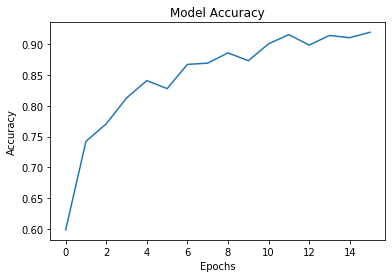

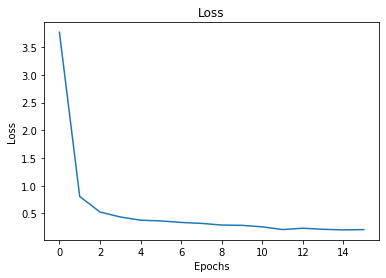

In [17]:
hst = model.history

# print(history.history.keys())

plt.plot(hst.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(hst.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()